<a href="https://colab.research.google.com/github/ivondini/2020-153_Tugas1_AnalisisBigData/blob/main/2020_153_Ivon_Viqro_Dini_Analisis_Big_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import library and load data**

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#mengambil data dari gdrive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#load dataset
StudentInfo=pd.read_csv('/content/drive/MyDrive/AnonymisedData/studentInfo.csv')
StudentAst= pd.read_csv('/content/drive/MyDrive/AnonymisedData/studentAssessment.csv')
Ast = pd.read_csv('/content/drive/MyDrive/AnonymisedData/assessments.csv')
Courses= pd.read_csv('/content/drive/MyDrive/AnonymisedData/courses.csv')
StudentRgst=pd.read_csv('/content/drive/MyDrive/AnonymisedData/studentRegistration.csv')
StudentVle = pd.read_csv('/content/drive/MyDrive/AnonymisedData/studentVle.csv')
Vle = pd.read_csv('/content/drive/MyDrive/AnonymisedData/vle.csv')

**Preprocessing**

# Student Info

In [ ]:
##Menampilkan 5 data teratas
StudentInfo.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [ ]:
#Mengecek nilai null dalam data
StudentInfo.isnull().sum()

code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64

In [ ]:
#Menampilkan info dari data
StudentInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


In [ ]:
#menampilkan ukuran data
StudentInfo.shape

(32593, 12)

# Student Assesment

In [ ]:
#Menampilkan 5 data teratas
StudentAst.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [ ]:
#Mengecek nilai null dalam data
StudentAst.isnull().sum()

id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64

In [ ]:
#Menampilkan info dari data
StudentAst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  int64  
 1   id_student      173912 non-null  int64  
 2   date_submitted  173912 non-null  int64  
 3   is_banked       173912 non-null  int64  
 4   score           173739 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 6.6 MB


In [ ]:
#menampilkan ukuran data
StudentAst.shape

(173912, 5)

# Student Registration

In [ ]:
#Menampilkan 5 data teratas
StudentRgst.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


In [ ]:
#Mengecek nilai null dalam data
StudentRgst.isnull().sum()

code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64

In [ ]:
#Menampilkan info dari data
StudentRgst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code_module          32593 non-null  object 
 1   code_presentation    32593 non-null  object 
 2   id_student           32593 non-null  int64  
 3   date_registration    32548 non-null  float64
 4   date_unregistration  10072 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


In [ ]:
#Melihat ukuran data
StudentRgst.shape

(32593, 5)

# Student Vle

In [ ]:
#Menampilkan 5 data teratas
StudentVle.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


In [ ]:
##Mengecek nilai null dalam data
StudentVle.isnull().sum()

code_module          0
code_presentation    0
id_student           0
id_site              0
date                 0
sum_click            0
dtype: int64

In [ ]:
#Menampilkan info dari data
StudentVle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10655280 entries, 0 to 10655279
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   code_module        object
 1   code_presentation  object
 2   id_student         int64 
 3   id_site            int64 
 4   date               int64 
 5   sum_click          int64 
dtypes: int64(4), object(2)
memory usage: 487.8+ MB


In [ ]:
#menampilkan ukuran data
StudentVle.shape

(10655280, 6)

# Vle

In [ ]:
#Menampilkan 5 data teratas
Vle.head()

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN


In [ ]:
#menampilkan ukuran data
Vle.shape

(6364, 6)

In [ ]:
##Mengecek nilai null dalam data
Vle.isnull().sum()

id_site                 0
code_module             0
code_presentation       0
activity_type           0
week_from            5243
week_to              5243
dtype: int64

In [ ]:
#Menampilkan info dari data
Vle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_site            6364 non-null   int64  
 1   code_module        6364 non-null   object 
 2   code_presentation  6364 non-null   object 
 3   activity_type      6364 non-null   object 
 4   week_from          1121 non-null   float64
 5   week_to            1121 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 298.4+ KB


# Assesment

In [ ]:
#Menampilkan 5 data teratas
Ast.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [ ]:
##Mengecek nilai null dalam data
Ast.isnull().sum()

code_module           0
code_presentation     0
id_assessment         0
assessment_type       0
date                 11
weight                0
dtype: int64

In [ ]:
#Menampilkan info dari data
Ast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB


In [ ]:
#menampilkan ukuran data
Ast.shape

(206, 6)

# Courses

In [ ]:
#Menampilkan 5 data teratas
Courses.head()

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


In [ ]:
##Mengecek nilai null dalam data
Courses.isnull().sum()

code_module                   0
code_presentation             0
module_presentation_length    0
dtype: int64

In [ ]:
#Menampilkan info dari data
Courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 656.0+ bytes


In [ ]:
#menampilkan ukuran data
Courses.shape

(22, 3)

# EDA

In [ ]:
# Menghapus nilai null karena dapat membuat ketidakkonsistenan dalam data dan akan mempengaruhi hasil analisis
StudentAst.dropna(inplace=True)
StudentInfo.dropna(inplace=True)
StudentVle.dropna(inplace=True)
StudentRgst.dropna(inplace=True)
Vle.dropna(inplace=True)
Courses.dropna(inplace=True)
Ast.dropna(inplace=True)

In [ ]:
#Menggabungkan data student info dan student assesment
df=pd.merge(StudentInfo, StudentAst, how='left', on=['id_student'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203546 entries, 0 to 203545
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   code_module           203546 non-null  object 
 1   code_presentation     203546 non-null  object 
 2   id_student            203546 non-null  int64  
 3   gender                203546 non-null  object 
 4   region                203546 non-null  object 
 5   highest_education     203546 non-null  object 
 6   imd_band              203546 non-null  object 
 7   age_band              203546 non-null  object 
 8   num_of_prev_attempts  203546 non-null  int64  
 9   studied_credits       203546 non-null  int64  
 10  disability            203546 non-null  object 
 11  final_result          203546 non-null  object 
 12  id_assessment         197778 non-null  float64
 13  date_submitted        197778 non-null  float64
 14  is_banked             197778 non-null  float64
 15  

Text(0.5, 1.0, 'Precentase gender siswa')

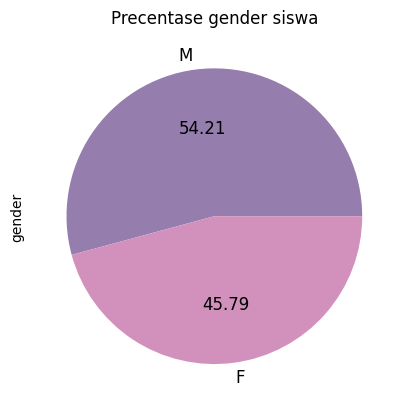

In [ ]:
#Menampilkan presentase gender
#dapat dilihat bahwa gender male lebih banyak daripada female
student_gender=StudentInfo.gender.value_counts()/len(StudentInfo.gender)
colors = ['#957DAD', '#D291BC']
student_gender.plot.pie(autopct='%.2f', fontsize=12, colors=colors)
plt.title("Precentase gender siswa")

Text(0.5, 1.0, 'Presentase siswa dengan disability')

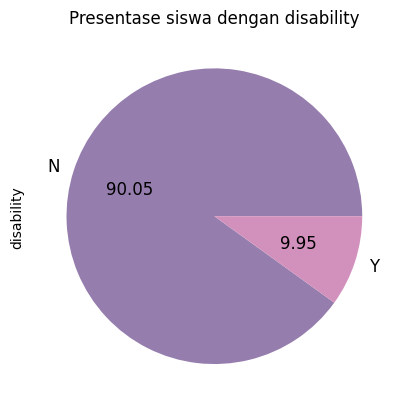

In [ ]:
#Menampilkan presentase disability
#Dari plot dibawah presentase siswa dengan disability adalah 10% dari total keseluruhan siswa
student_disability=StudentInfo.disability.value_counts()/len(StudentInfo.disability)
colors = ['#957DAD', '#D291BC']
student_disability.plot.pie(autopct='%.2f', fontsize=12, colors=colors)
plt.title("Presentase siswa dengan disability")

Text(0.5, 1.0, 'Histogram final result')

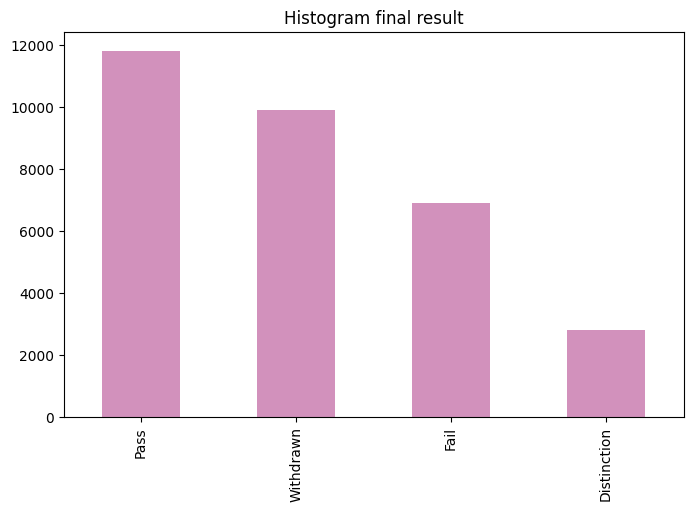

In [ ]:
#Menampilkan histogram dari final result siswa
# Hasil menunjukkan bahwa siswa yang fail hampir setengah dari siswa yang lulus
fig, ax = plt.subplots(figsize=(8, 5))
StudentInfo['final_result'].value_counts().plot.bar(color='#D291BC')
plt.title("Histogram final result")

Text(0.5, 1.0, 'Jumlah Siswa Dengan Berbagai level Edukasi')

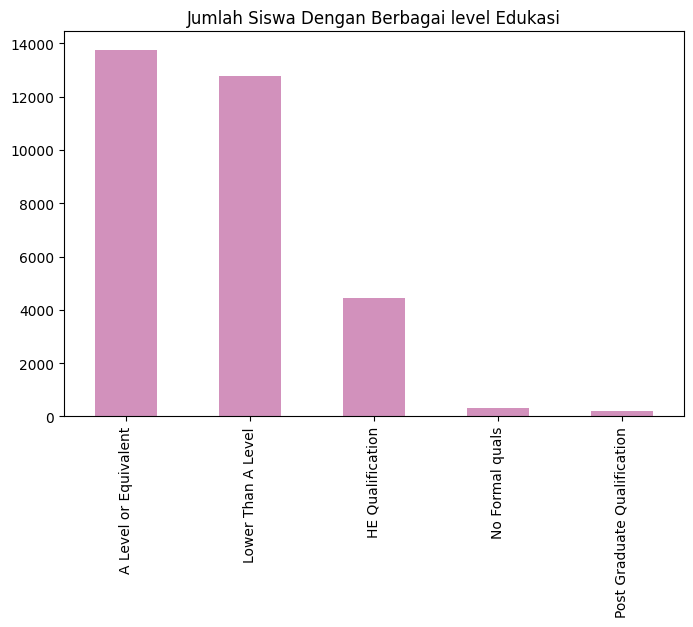

In [ ]:
#Menampilkan jumlah siswa dengan berbagai level edukasi
#paling banyak siswa dengan A level
fig, ax = plt.subplots(figsize=(8, 5))
StudentInfo['highest_education'].value_counts().plot.bar(color='#D291BC')
plt.title("Jumlah Siswa Dengan Berbagai level Edukasi")

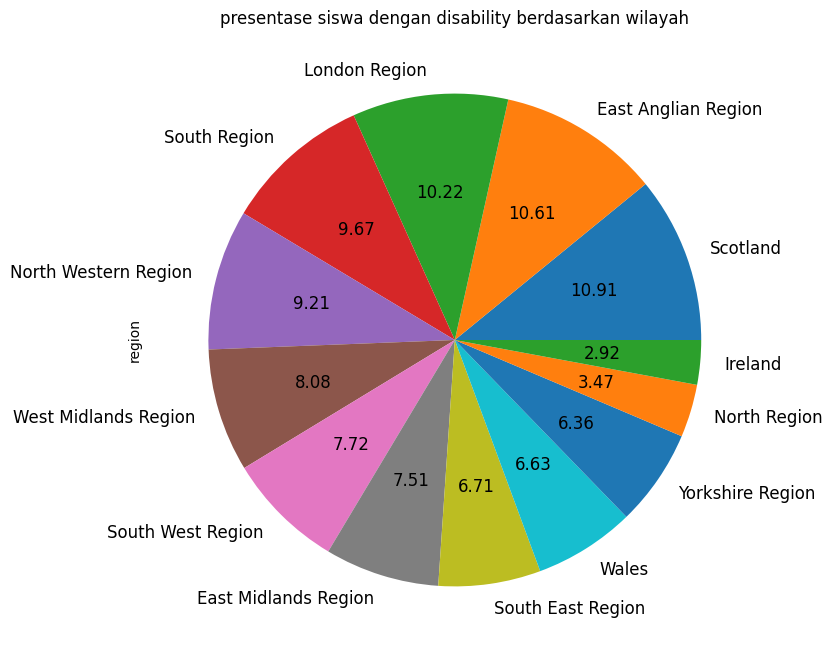

In [ ]:
#Menampilkan presentase siswa dengan disability berdasarkan wilayah
#siswa terbanyak dengan disabilty berada di scotland
disability_region=StudentInfo.region.value_counts()/len(StudentInfo.disability)
disability_region.plot.pie(autopct='%.2f', fontsize=12,figsize=(10,8))
plt.title("presentase siswa dengan disability berdasarkan wilayah")
plt.show()

Text(0.5, 1.0, 'Histogram final result by Gender')

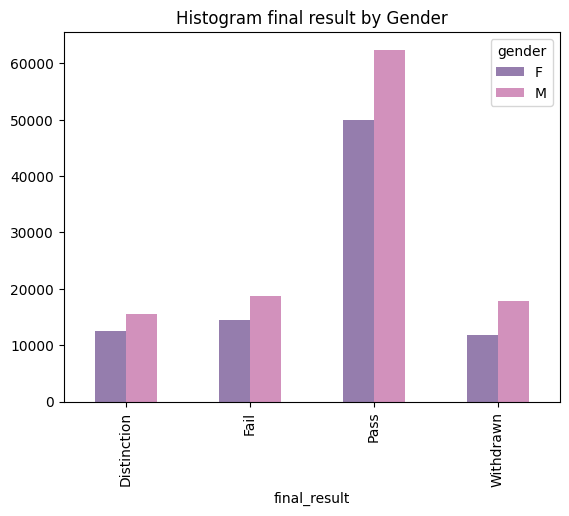

In [ ]:
#menampilkan perbandingan gender female dan man berdasarkan final result
#Dari tampilan tabel dibawah dapat dikatakan bahwa female paling tinggi dalam pass , fail , distinction dan withdrawn
gender_column = df['gender']
result_gender_counts = df.groupby(["final_result", gender_column]).size().unstack(level=1)
colors = ['#957DAD', '#D291BC']
result_gender_counts.plot(kind='bar', color=colors)
plt.title("Histogram final result by Gender")

Text(0.5, 1.0, 'Histogram final result by Disability')

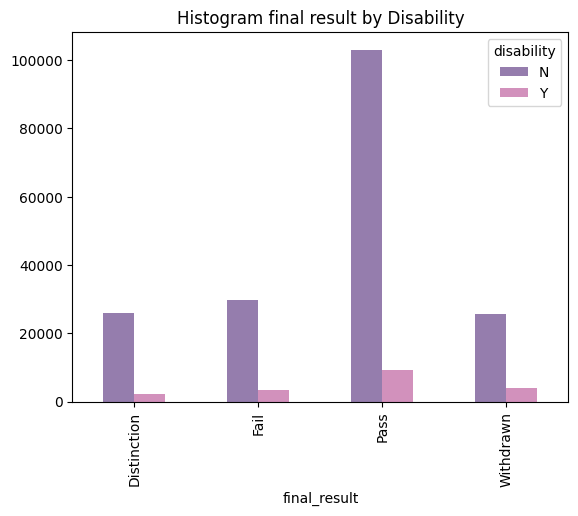

In [ ]:
#Menampilkan disability dengan final results
gender_column = df['disability']
result_gender_counts = df.groupby(["final_result", gender_column]).size().unstack(level=1)
colors = ['#957DAD', '#D291BC']
result_gender_counts.plot(kind='bar', color=colors)
plt.title("Histogram final result by Disability")